## Exploratory Data Analysis (EDA) - IT Jobs Dataset

This notebook performs an exploratory analysis of transformed IT-related job datasets.  
The goal is to understand the structure, key features, and distributions across companies, jobs, and salaries.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Base paths
base_path = "../data/transformed"


#### Load Transformed Datasets


In [37]:
# Companies
df_companies = pd.read_csv(os.path.join(base_path, "companies", "it_companies.csv"))
df_industries = pd.read_csv(os.path.join(base_path, "companies", "it_company_industries.csv"))
df_employee_counts = pd.read_csv(os.path.join(base_path, "companies", "it_employee_counts.csv"))
df_specialities = pd.read_csv(os.path.join(base_path, "companies", "it_specialities.csv"))

# Jobs
df_benefits = pd.read_csv(os.path.join(base_path, "jobs", "it_benefits.csv"))
df_job_industries = pd.read_csv(os.path.join(base_path, "jobs", "it_job_industries_cleaned.csv"))
df_job_skills = pd.read_csv(os.path.join(base_path, "jobs", "it_job_skills.csv"))
df_salaries = pd.read_csv(os.path.join(base_path, "jobs", "it_salaries.csv"))

# Mappings
df_industry_map = pd.read_csv(os.path.join(base_path, "mappings", "industries_it_only.csv"))

# Postings
df_postings = pd.read_csv(os.path.join(base_path, "postings", "postings_it_cleaned.csv"))


#### Dataset Previews and Info
View the first few rows and structural info for each dataset.


In [38]:
datasets = {
    "Companies": df_companies,
    "Company Industries": df_industries,
    "Employee Counts": df_employee_counts,
    "Company Specialities": df_specialities,
    "Job Benefits": df_benefits,
    "Job Industries": df_job_industries,
    "Job Skills": df_job_skills,
    "Job Salaries": df_salaries,
    "Industry Mappings": df_industry_map,
    "Job Postings": df_postings,
}

for name, df in datasets.items():
    print(f"🔍 {name}")
    print(df.head(3))
    print(df.info())
    print("\n" + "-"*80 + "\n")


🔍 Companies
   company_id                        name  \
0        1009                         IBM   
1        1025  Hewlett Packard Enterprise   
2        1028                      Oracle   

                                         description  company_size  state  \
0  At IBM, we do more than work. We create. We cr...           7.0     NY   
1  Official LinkedIn of Hewlett Packard Enterpris...           7.0  Texas   
2  We’re a cloud technology company that provides...           7.0  Texas   

  country              city zip_code                                address  \
0      US  Armonk, New York    10504  International Business Machines Corp.   
1      US           Houston    77389            1701 E Mossy Oaks Rd Spring   
2      US            Austin    78741                        2300 Oracle Way   

                                                 url  
0               https://www.linkedin.com/company/ibm  
1  https://www.linkedin.com/company/hewlett-packa...  
2            htt

#### Exploratory Visualizations
We explore:
- Domain Distribution of IT Jobs
- Skills in Demand
- Company specializations
- Job posting 
- Domain/industry distribution


#### Skills Demand Analysis



SKILLS DEMAND ANALYSIS

Top 20 In-Demand IT Skills:
   1. Artificial Intelligence: 944 job postings (6.1%)
   2. Cloud Computing: 367 job postings (2.4%)
   3. Java: 267 job postings (1.7%)
   4. DevOps: 168 job postings (1.1%)
   5. Azure: 130 job postings (0.8%)
   6. AWS: 129 job postings (0.8%)
   7. Git: 111 job postings (0.7%)
   8. Machine Learning: 105 job postings (0.7%)
   9. Python: 104 job postings (0.7%)
  10. REST API: 84 job postings (0.5%)
  11. SQL: 79 job postings (0.5%)
  12. React: 54 job postings (0.4%)
  13. Agile: 54 job postings (0.4%)
  14. JavaScript: 53 job postings (0.3%)
  15. Linux: 50 job postings (0.3%)
  16. Data Science: 46 job postings (0.3%)
  17. Power BI: 38 job postings (0.2%)
  18. Node.js: 26 job postings (0.2%)
  19. Angular: 24 job postings (0.2%)
  20. Spark: 20 job postings (0.1%)


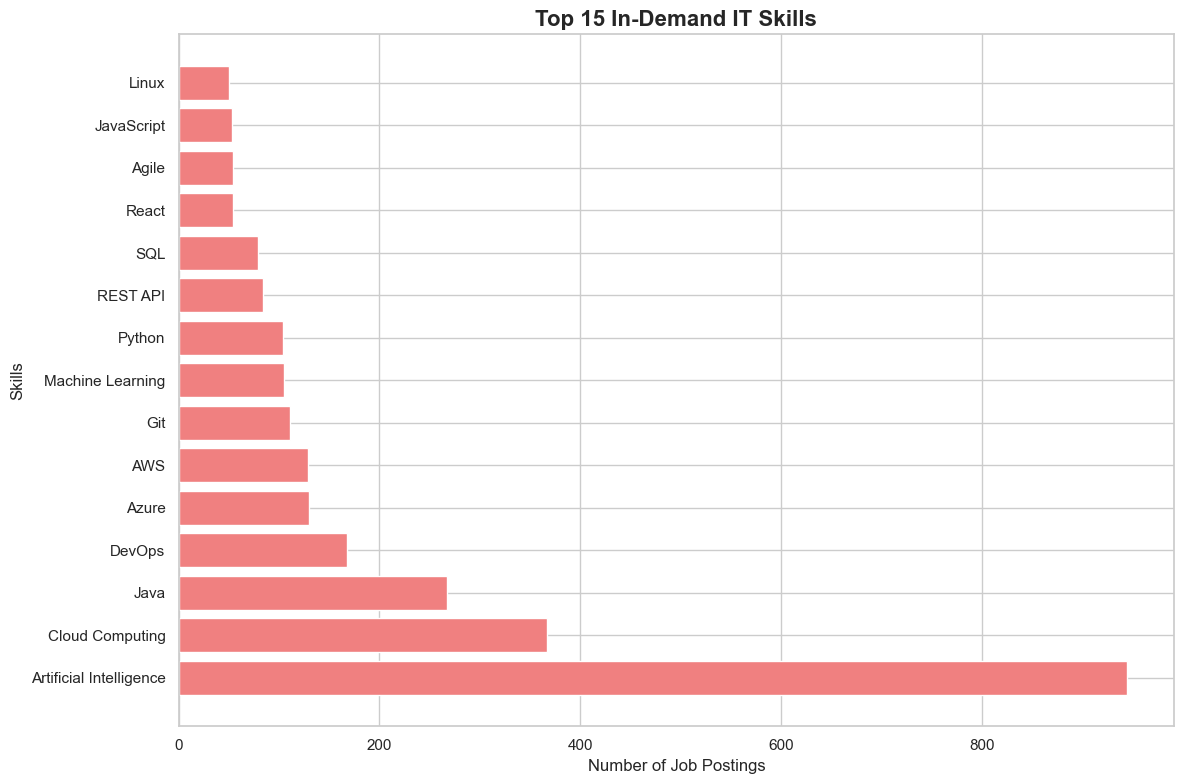

In [77]:
# 📊 Skills Demand Analysis

print("\n" + "="*60)
print("SKILLS DEMAND ANALYSIS")
print("="*60)

# Define relevant IT skills and their keyword variants
skill_keywords = {
    'Python': ['python'],
    'Java': ['java'],
    'JavaScript': ['javascript', 'js'],
    'SQL': ['sql'],
    'AWS': ['aws', 'amazon web services'],
    'Docker': ['docker'],
    'Kubernetes': ['kubernetes', 'k8s'],
    'React': ['react'],
    'Angular': ['angular'],
    'Node.js': ['node.js', 'nodejs'],
    'Machine Learning': ['machine learning', 'ml'],
    'Artificial Intelligence': ['artificial intelligence', 'ai'],
    'Data Science': ['data science'],
    'Cloud Computing': ['cloud'],
    'DevOps': ['devops'],
    'Agile': ['agile', 'scrum'],
    'Git': ['git', 'github'],
    'Linux': ['linux'],
    'Azure': ['azure'],
    'TensorFlow': ['tensorflow'],
    'PyTorch': ['pytorch'],
    'Spark': ['spark'],
    'Hadoop': ['hadoop'],
    'Tableau': ['tableau'],
    'Power BI': ['power bi', 'powerbi'],
    'REST API': ['rest', 'api'],
    'MongoDB': ['mongodb'],
    'PostgreSQL': ['postgresql', 'postgres'],
    'MySQL': ['mysql'],
    'Redis': ['redis'],
    'Elasticsearch': ['elasticsearch'],
    'Jenkins': ['jenkins'],
    'Terraform': ['terraform'],
    'Ansible': ['ansible']
}

# Initialize counts
skill_counts = {}

# Count occurrences in job titles and descriptions
for skill, keywords in skill_keywords.items():
    count = 0
    for keyword in keywords:
        title_matches = df['title'].str.contains(keyword, case=False, na=False).sum()
        desc_matches = df['skills_desc'].str.contains(keyword, case=False, na=False).sum()
        count += max(title_matches, desc_matches)
    skill_counts[skill] = count

# Sort by frequency
sorted_skills = sorted(skill_counts.items(), key=lambda x: x[1], reverse=True)

# Display top 20
print("\nTop 20 In-Demand IT Skills:")
for i, (skill, count) in enumerate(sorted_skills[:20], 1):
    pct = (count / len(df)) * 100
    print(f"  {i:2d}. {skill}: {count:,} job postings ({pct:.1f}%)")

# Plot the top 15 skills
top_skills = dict(sorted_skills[:15])

plt.figure(figsize=(12, 8))
plt.barh(list(top_skills.keys()), list(top_skills.values()), color='lightcoral')
plt.title('Top 15 In-Demand IT Skills', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Skills', fontsize=12)
plt.tight_layout()
plt.show()



#### Most Common Keywords in Job Descriptions

In [66]:
# Drop NaNs in skills_desc column
desc = df['skills_desc'].dropna()

# Sample keyword frequency list (replace with actual processed output)
from collections import Counter
import re

# Tokenize the text data
tokens = []
for line in desc:
    words = re.findall(r'\b\w+\b', line.lower())  # remove punctuation, lowercase
    tokens.extend(words)

# Count keyword frequencies
keyword_counts = Counter(tokens).most_common()

# Define stopwords and non-informative tokens to remove
stopwords = set([
    ',', '.', 'and', 'to', 'of', 'in', 'the', 'with', 'a', 'is',
    'or', 'we', 'for', 'on', 'you', 'your', 'as', 'by', 'an', 'be', 'at'
])

# Filter the keywords
filtered_keywords = [(word, count) for word, count in keyword_counts if word not in stopwords]

# Display the filtered keywords
print("Top filtered keywords:")
for word, count in filtered_keywords[:20]:  # top 20 keywords
    print(f"{word}: {count}")


Top filtered keywords:
data: 57
java: 31
management: 30
experience: 30
sql: 28
python: 22
oracle: 21
engineer: 20
sap: 18
aws: 18
agile: 17
business: 16
cloud: 16
software: 15
development: 15
project: 15
security: 13
service: 12
analysis: 12
technical: 12


#### Domain Distribution of IT Jobs

C:\Users\USER\AppData\Local\Temp\ipykernel_23940\3830487718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_domains.index, x=top_domains.values, palette="Blues_d")


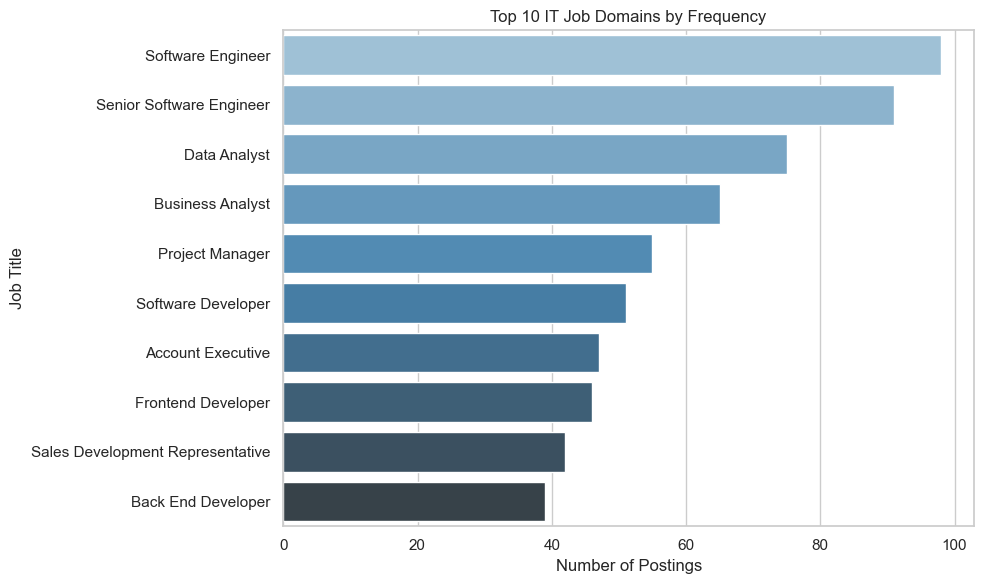

In [39]:
# Job Title frequency plot (e.g., Software Engineer, Data Scientist)
plt.figure(figsize=(10, 6))
top_domains = df_postings['title'].value_counts().nlargest(10)
sns.barplot(y=top_domains.index, x=top_domains.values, palette="Blues_d")
plt.title("Top 10 IT Job Domains by Frequency")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


#### Most Common Job Titles

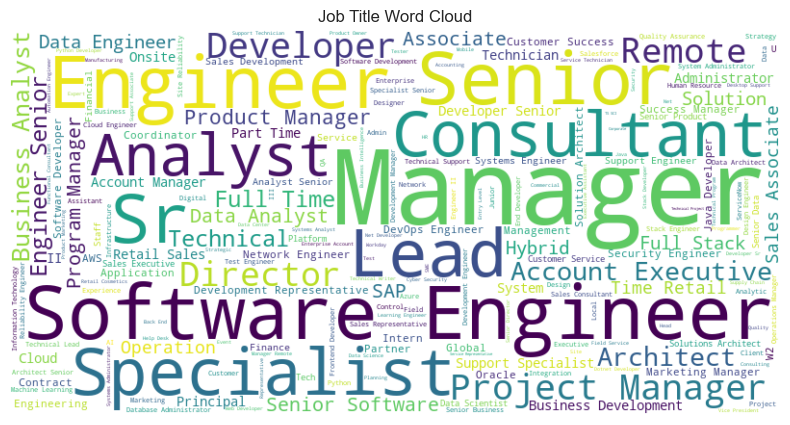

In [40]:
# Word cloud of job titles 
from wordcloud import WordCloud

text = " ".join(title for title in df_postings['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Job Title Word Cloud")
plt.show()


#### Company Specialization Distribution

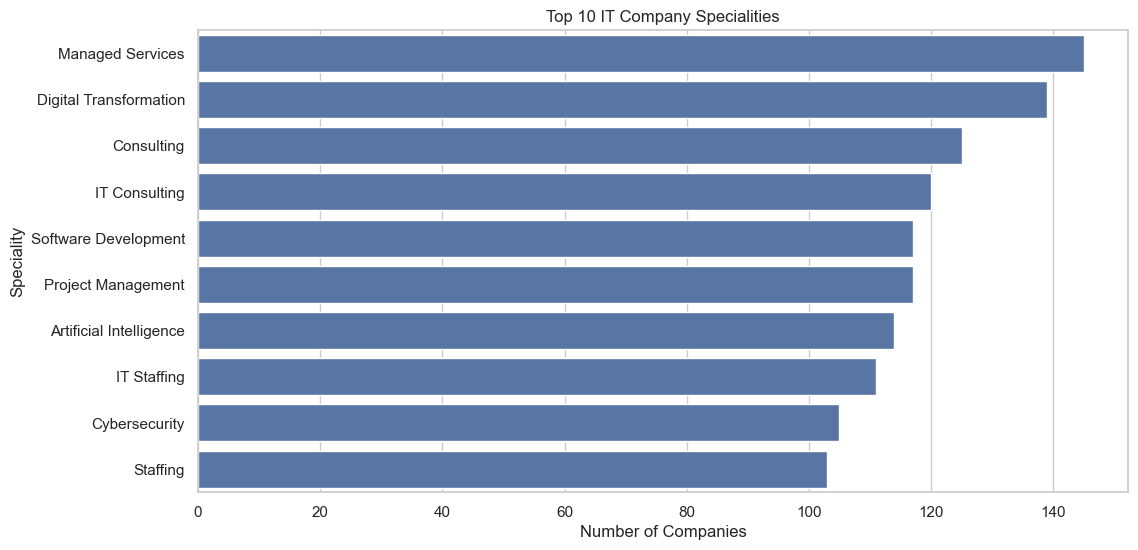

In [41]:
top_specs = df_specialities['speciality'].value_counts().nlargest(10)

sns.barplot(y=top_specs.index, x=top_specs.values)
plt.title("Top 10 IT Company Specialities")
plt.xlabel("Number of Companies")
plt.ylabel("Speciality")
plt.show()


#### Companies with the Most Job Postings

C:\Users\USER\AppData\Local\Temp\ipykernel_23940\360489081.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies_named, y='name', x='post_count', palette='magma')


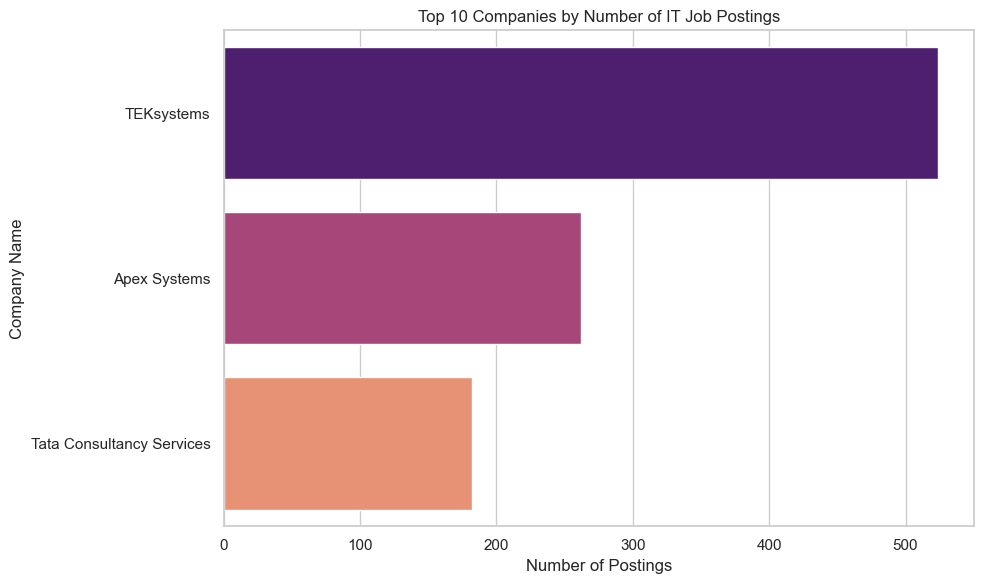

In [ ]:
top_companies = df_postings['company_id'].value_counts().head(10).reset_index()
top_companies.columns = ['company_id', 'post_count']

# Merge to get company names
top_companies_named = top_companies.merge(df_companies[['company_id', 'name']], on='company_id')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_companies_named, y='name', x='post_count', palette='magma')
plt.title("Top 10 Companies by Number of IT Job Postings")
plt.xlabel("Number of Postings")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()


#### Top 20 Highest Paying Tech Job Titles by Max Salary (Yearly)


In [61]:
keywords = ['engineer', 'developer', 'software', 'data', 'cloud', 'it', 'devops', 'cyber', 'security', 'backend', 'frontend', 'ai', 'ml']

# Filter IT jobs by title
it_jobs = df_postings[df_postings['title'].str.contains('|'.join(keywords), case=False, na=False)]

# Remove missing and extreme salary values
it_jobs = it_jobs.dropna(subset=['max_salary'])
it_jobs = it_jobs[it_jobs['max_salary'] < 1_000_000]  # Optional: cap unrealistic salaries

# Select relevant columns
top_it_jobs = it_jobs[['title', 'max_salary', 'pay_period']].copy()

# Sort and get top 20
top_20_it_jobs = top_it_jobs.sort_values(by='max_salary', ascending=False).head(20).reset_index(drop=True)

print(top_20_it_jobs)


                                                title  max_salary pay_period
0                                   Software Engineer    850000.0     YEARLY
1   Multi-Strat Hedge Fund | Senior Software Engineer    800000.0     YEARLY
2   Senior Blockchain Engineer (Rust & Solana) - 1...    800000.0     YEARLY
3                                    Python Developer    750000.0     YEARLY
4                                   Software Engineer    600000.0     YEARLY
5                            Senior Software Engineer    550000.0     YEARLY
6   High Frequency Trading | Senior Software Engineer    487000.0     YEARLY
7   High Frequency Trading | Senior Software Engineer    487000.0     YEARLY
8         HFT Trading Firm | Senior Software Engineer    487000.0     YEARLY
9                  Partner, Dell Technologies Capital    475000.0     YEARLY
10                    VP, Product Management AI - GTM    472900.0     YEARLY
11                                Head of Engineering    450000.0     YEARLY

#### Posts with Most and Least Views and Applies

In [71]:
# Most viewed posts
most_viewed = df.sort_values(by='views', ascending=False).head(5)
most_viewed[['title', 'company_name', 'views', 'applies']]


,title,company_name,views,applies
11478,Customer Success Manager,Prelude,5518.0,15.0
11422,Supply Chain Analyst,Backblaze,5132.0,90.0
942,Customer Operations - Talent Community,PointClickCare,4753.0,3.0
2455,Customer Success Associate,Propel,3466.0,263.0
2259,Technical Support Specialist,Odoo,1637.0,14.0


In [73]:
# Most applied-to posts
most_applies = df.sort_values(by='applies', ascending=False).head(5)
most_applies[['title', 'company_name', 'applies', 'views']]


,title,company_name,applies,views
6791,Java developer,Quantum World Technologies Inc.,430.0,827.0
6781,Help Desk Specialist,The Select Group,429.0,1616.0
709,SOC Analyst Internship,"360 SOC, Inc.",417.0,1267.0
12627,Frontend Engineer,Gaze,406.0,935.0
9761,Data Analyst,ClarisHealth,369.0,1142.0


In [72]:
# Least viewed posts
least_viewed = df.sort_values(by='views', ascending=True).head(5)
least_viewed[['title', 'company_name', 'views', 'applies']]


,title,company_name,views,applies
11729,Data Entry Specialist,Collabera,0.0,0.0
11716,Solution Architect (Windchill Architect),Visionary Innovative Technology Solutions LLC,0.0,0.0
11711,Cloud Architect,Infosys,0.0,0.0
3735,Senior HPC Administrator,Edify Technologies,0.0,0.0
11692,Cloud Architect,Infosys,0.0,0.0


In [74]:
# Least applied-to posts
least_applies = df.sort_values(by='applies', ascending=True).head(5)
least_applies[['title', 'company_name', 'applies', 'views']]


,title,company_name,applies,views
0,Software Engineer,NaN,0.0,1.0
9662,Deputy Chief Engineer,Revel IT,0.0,10.0
9671,Front Office Receptionist,New York Global Consultants Inc. (NYGCI),0.0,24.0
9674,Staff Accountant,Ping Identity,0.0,7.0
9676,IMS DB Admin,Compunnel Inc.,0.0,8.0
